Data import


In [ ]:
import torch
from torchvision import datasets,transforms

# specific the data path in which you would like to store the downloaded files
# here, we save it to the folder called "mnist_data"
# ToTensor() here is used to convert data type to tensor, so that can be used in network

train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor(), download=True)

print(train_dataset)

batchSize=128

#only after packed in DataLoader, can we feed the data into the neural network iteratively
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batchSize, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batchSize, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 91.6MB/s]


Extracting ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 16.7MB/s]

Extracting ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 90.4MB/s]


Extracting ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.77MB/s]

Extracting ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./mnist_data/
    Split: Train
    StandardTransform
Transform: ToTensor()


Displaying examle image

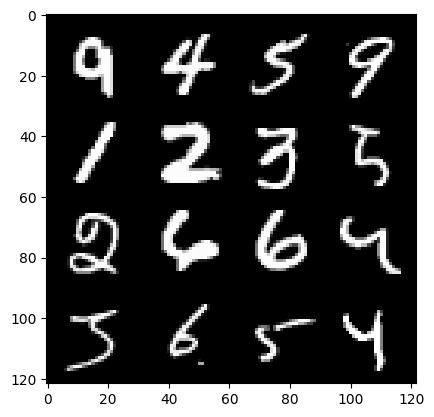

In [ ]:
# package we used to manipulate matrix
import numpy as np
# package we used for image processing
from matplotlib import pyplot as plt
from torchvision.utils import make_grid

def imshow(img):
    npimg = img.numpy()
    #transpose: change array axis to correspond to the plt.imshow() function
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# load the first 16 training samples from next iteration
# [:16,:,:,:] for the 4 dimension of examples, first dimension take first 16, other dimension take all data
# arrange the image in grid
examples, _ = next(iter(train_loader))
example_show=make_grid(examples[:16,:,:,:], 4)

# then display them
imshow(example_show)

Building Autoencoder network

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Network Parameters
num_hidden_1 = 256  # 1st layer num features
num_hidden_2 = 128  # 2nd layer num features (the latent dim)
num_input = 784  # MNIST data input (img shape: 28*28)


# Building the encoder
class Autoencoder(nn.Module):
    def __init__(self, x_dim, h_dim1, h_dim2):
        super(Autoencoder, self).__init__()
        # encoder part
        self.fc1 = nn.Linear(x_dim, h_dim1)
        self.fc2 = nn.Linear(h_dim1, h_dim2)
        # decoder part
        self.fc3 = nn.Linear(h_dim2, h_dim1)
        self.fc4 = nn.Linear(h_dim1, x_dim)

    def encoder(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

    def decoder(self, x):
        x = torch.sigmoid(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# When initialzing, it will run __init__() function as above
model = Autoencoder(num_input, num_hidden_1, num_hidden_2)

Trening

In [ ]:
from torch.utils.data import DataLoader
torch.backends.cudnn.benchmark = True

#Define loss and parameters
optimizer = optim.Adam(model.parameters())
epoch = 30
loss_function = nn.MSELoss()

# Preparing the DataLoader for MNIST
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)

# Training loop
print('====Training start====')
for i in range(epoch):
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):  # Korzystamy z istniejącego train_loader
        # Prepare input data
        inputs = torch.reshape(data, (-1, 784))  # Reshape to satisfy input dimensions

        # Set gradient to zero
        optimizer.zero_grad()

        # Feed inputs into model
        recon_x = model(inputs)

        # Calculating loss
        loss = loss_function(recon_x, inputs)

        # Calculate gradient of each parameter
        loss.backward()
        train_loss += loss.item()

        # Update the weight based on the gradient calculated
        optimizer.step()

    if i % 10 == 0:
        print('====> Epoch: {} Average loss: {:.9f}'.format(i, train_loss))
print('====Training finish====')

====Training start====
====> Epoch: 0 Average loss: 201.726133347
====> Epoch: 10 Average loss: 201.482785165
====> Epoch: 20 Average loss: 201.363382339
====Training finish====


Test

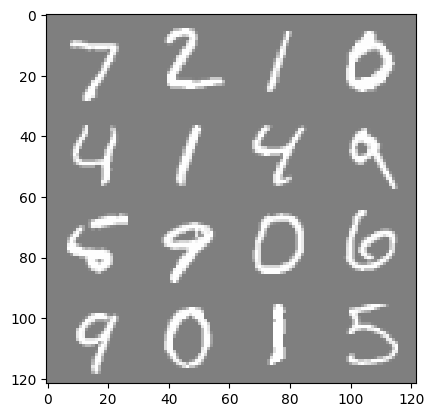

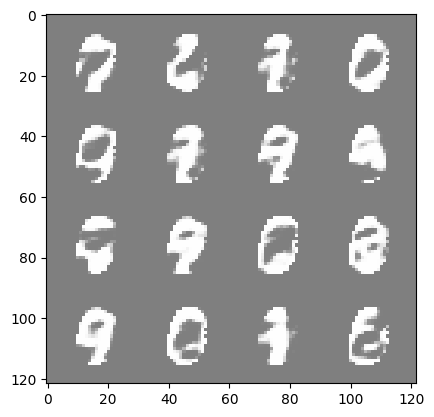

In [ ]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

# Helper function to display images
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Load 16 images from testset
inputs, _ = next(iter(test_loader))
inputs_example = make_grid(inputs[:16, :, :, :], nrow=4)
imshow(inputs_example)

# Convert from image to tensor
inputs = torch.reshape(inputs, (-1, 784))

# Get the outputs from the trained model
outputs = model(inputs)

# Convert from tensor to image
outputs = torch.reshape(outputs, (-1, 1, 28, 28))  # Dopasowanie do formatu obrazu
outputs = outputs.detach()  # Odłączenie od grafu obliczeń

# Show the output images
outputs_example = make_grid(outputs[:16, :, :, :], nrow=4)
imshow(outputs_example)


In [3]:
!git config --global user.name "stankubricc"
!git config --global user.email "fritz@student.agh.edu.pl"

In [4]:
!git clone https://github.com/stankubricc/autoenkoder_mnist

Cloning into 'autoenkoder_mnist'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 49.60 KiB | 24.80 MiB/s, done.


In [6]:
!cp "/content/autoenkoder_mnist/autoenkoder.ipynb" "/content/autoenkoder_mnist"

cp: '/content/autoenkoder_mnist/autoenkoder.ipynb' and '/content/autoenkoder_mnist/autoenkoder.ipynb' are the same file
